In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import pandas as pd
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

## 1.

In [3]:
elect = pd.read_csv('../data/electric.csv')
elect

,Unnamed: 0,전기생산량,전기사용량
0,0,3.52,2.48
1,1,2.58,2.27
2,2,3.31,2.47
3,3,4.07,2.77
4,4,4.62,2.98
5,5,3.98,3.05
6,6,4.29,3.18
7,7,4.83,3.46
8,8,3.71,3.03
9,9,4.61,3.25


In [4]:
x = elect[['전기생산량']]
y = elect[['전기사용량']]

In [5]:
x

,전기생산량
0,3.52
1,2.58
2,3.31
3,4.07
4,4.62
5,3.98
6,4.29
7,4.83
8,3.71
9,4.61


In [6]:
y

,전기사용량
0,2.48
1,2.27
2,2.47
3,2.77
4,2.98
5,3.05
6,3.18
7,3.46
8,3.03
9,3.25


In [7]:
elect_lr = LinearRegression()

In [8]:
elect_lr.fit(x, y)

LinearRegression()

In [9]:
elect_lr.coef_

array([[0.49560324]])

In [10]:
elect_lr.intercept_

array([0.91958143])

In [11]:
# 전기생산량이 3.2, 4.5 인 경우
elect_lr.predict([[3.2], [4.5]])

array([[2.50551178],
       [3.14979599]])

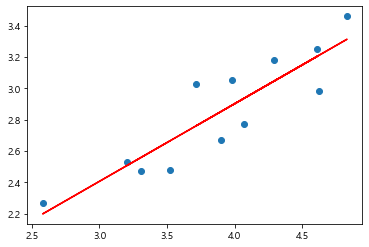

In [12]:
# scatter, plot
y_predict = elect_lr.predict(x)
plt.scatter(x, y)
plt.plot(x, y_predict, 'r')
plt.show()

## 2. 선형회귀 통계공식을 파이썬코드로 직접 구현해서 1번 데이터 w, b를 구하시오

In [15]:
x = np.array(elect['전기생산량'])
y = np.array(elect['전기사용량'])
x, y

(array([3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.9 ,
        3.2 ]),
 array([2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67,
        2.53]))

### 방법1

In [16]:
x_mu=np.mean(x)
y_mu=np.mean(y)

b1=np.sum((x-x_mu)*(y-y_mu))/np.sum((x-x_mu)**2)
b0= y_mu-b1*x_mu

print( b1, b0)

0.4956032360182904 0.919581428068942


### 방법2

In [53]:
def cost(x, y, w) :
    hy = w * x
    cost = np.sum((hy - y) ** 2) / len(x)
    return cost

w = 5
b = 2
n = len(x)
epochs = 5000
learning_rate = 0.01

for i in range(epochs) : 
    hy = w * x + b
    cost = np.sum((hy - y) ** 2) / n
    gradientW = np.sum((w * x + b - y) * 2 * x) / n 
    gradientB = np.sum((w * x + b - y) * 2) / n
    w = w - learning_rate * gradientW
    b = b - learning_rate * gradientB

print('최종 w : ', w)
print('최종 b : ', b)

최종 w :  0.496640323573879
최종 b :  0.9154513552669852


### 비교

In [49]:
elect_lr.coef_, elect_lr.intercept_

(array([[0.49560324]]), array([0.91958143]))

## 3. $$ (3x + 2) ^ 3 $$ 미분 전개 과정

$$ 3x + 2 = y $$

라고 하면

$$ (3x + 2) ^ 3 = y ^ 3 $$
이 될 것이다

$$ y ^ 3 $$
을 미분하면

$$ 3y^2 $$
이고 y를 다시 바꿔주면

$$ 3(3x + 2) ^ 2 x 3 $$